# Task 3: Monthly Spending Prediciton

In this task, we will have to predict the amount of user spending per month using regression model.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import joblib
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split



## Step 1: Data Preparation

In [7]:
df = pd.read_csv("task3/train.csv")

df.head()

,id,player_id,friend_count,social_interactions,guild_membership,event_participation_rate,daily_login_streak,avg_session_length,sessions_per_week,total_playtime_hours,days_since_last_login,achievement_count,achievement_completion_rate,historical_spending,prev_month_spending,total_transactions,avg_transaction_value,account_age_days,vip_status,is_premium_member,primary_game,games_played,cross_game_activity,platform,days_since_last_purchase,purchase_frequency,payment_methods_used,purchases_on_discount,discount_rate_used,seasonal_spending_pattern,owns_limited_edition,competitive_rank,tournament_participation,segment,spending_30d
0,PLY00001,P007453,140.0,39.0,NaN,35.495321,86.0,94.186687,20.660400,793.043827,6.918242,375.0,66.677804,NaN,960.560273,4.0,643.882786,76.0,0.0,0.0,0.0,4.0,27.0,0.0,11.375597,NaN,1.0,1.0,0.250000,4.0,NaN,7.0,1.0,1.0,0.00
1,PLY00002,P120776,126.0,12.0,1.0,35.222611,27.0,76.694036,15.112974,836.397667,3.514021,111.0,48.742068,193.279885,70.552503,43.0,NaN,1037.0,0.0,0.0,3.0,1.0,10.0,1.0,38.325987,11.193590,1.0,25.0,0.581395,5.0,0.0,3.0,0.0,1.0,0.00
2,PLY00003,P083055,157.0,63.0,1.0,54.291374,1.0,66.680997,13.770480,561.212807,1.863368,82.0,35.275348,24.147713,8.402845,49.0,0.492810,418.0,0.0,0.0,NaN,2.0,16.0,2.0,21.426924,5.175272,3.0,27.0,0.551020,7.0,0.0,5.0,0.0,1.0,0.00
3,PLY00004,P087827,89.0,96.0,1.0,52.990011,74.0,75.864572,11.941930,NaN,5.973982,122.0,49.815387,2145.126609,654.006363,41.0,52.320161,129.0,3.0,1.0,4.0,1.0,7.0,0.0,28.915478,10.374656,2.0,22.0,0.536585,6.0,0.0,9.0,0.0,2.0,2223.70
4,PLY00005,P045133,159.0,80.0,0.0,78.586509,84.0,33.774836,1.405901,617.041867,5.570188,189.0,89.271401,58696.454814,18294.693940,NaN,1397.534638,478.0,3.0,1.0,4.0,2.0,NaN,1.0,13.011954,NaN,3.0,11.0,0.261905,0.0,1.0,4.0,0.0,3.0,156634.22


In [8]:
df.isnull().sum()

id                                0
player_id                         0
friend_count                   6046
social_interactions            6106
guild_membership               6028
event_participation_rate       6001
daily_login_streak             6107
avg_session_length             6028
sessions_per_week              6162
total_playtime_hours           6132
days_since_last_login          6040
achievement_count              6011
achievement_completion_rate    6061
historical_spending            6099
prev_month_spending            5969
total_transactions             6133
avg_transaction_value          6031
account_age_days               6102
vip_status                     6094
is_premium_member              6021
primary_game                   6168
games_played                   5985
cross_game_activity            6083
platform                       6095
days_since_last_purchase       6148
purchase_frequency             5995
payment_methods_used           6108
purchases_on_discount       

In [9]:
df.dtypes

id                              object
player_id                       object
friend_count                   float64
social_interactions            float64
guild_membership               float64
event_participation_rate       float64
daily_login_streak             float64
avg_session_length             float64
sessions_per_week              float64
total_playtime_hours           float64
days_since_last_login          float64
achievement_count              float64
achievement_completion_rate    float64
historical_spending            float64
prev_month_spending            float64
total_transactions             float64
avg_transaction_value          float64
account_age_days               float64
vip_status                     float64
is_premium_member              float64
primary_game                   float64
games_played                   float64
cross_game_activity            float64
platform                       float64
days_since_last_purchase       float64
purchase_frequency       

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
friend_count,97954.0,110.807808,65.428794,0.000000,60.000000,106.000000,155.000000,396.000000
social_interactions,97894.0,65.950048,37.994117,0.000000,36.000000,64.000000,92.000000,257.000000
guild_membership,97972.0,0.598355,0.490233,0.000000,0.000000,1.000000,1.000000,1.000000
event_participation_rate,97999.0,39.560263,18.466553,10.000034,25.371582,36.051588,52.955168,84.998193
daily_login_streak,97893.0,56.803357,35.726540,0.000000,28.000000,54.000000,81.000000,227.000000
avg_session_length,97972.0,110.275648,54.933788,20.005037,66.829061,105.664336,147.207074,365.836226
sessions_per_week,97838.0,14.261798,7.566377,1.001231,8.422158,13.866458,19.430879,47.415109
total_playtime_hours,97868.0,595.330260,293.774141,50.011515,374.969169,584.461687,795.347685,1990.852714
days_since_last_login,97960.0,7.341601,5.478538,0.000147,2.953816,6.242609,10.619451,40.338397
achievement_count,97989.0,161.517803,81.120208,0.000000,102.000000,160.000000,217.000000,512.000000


<Axes: >

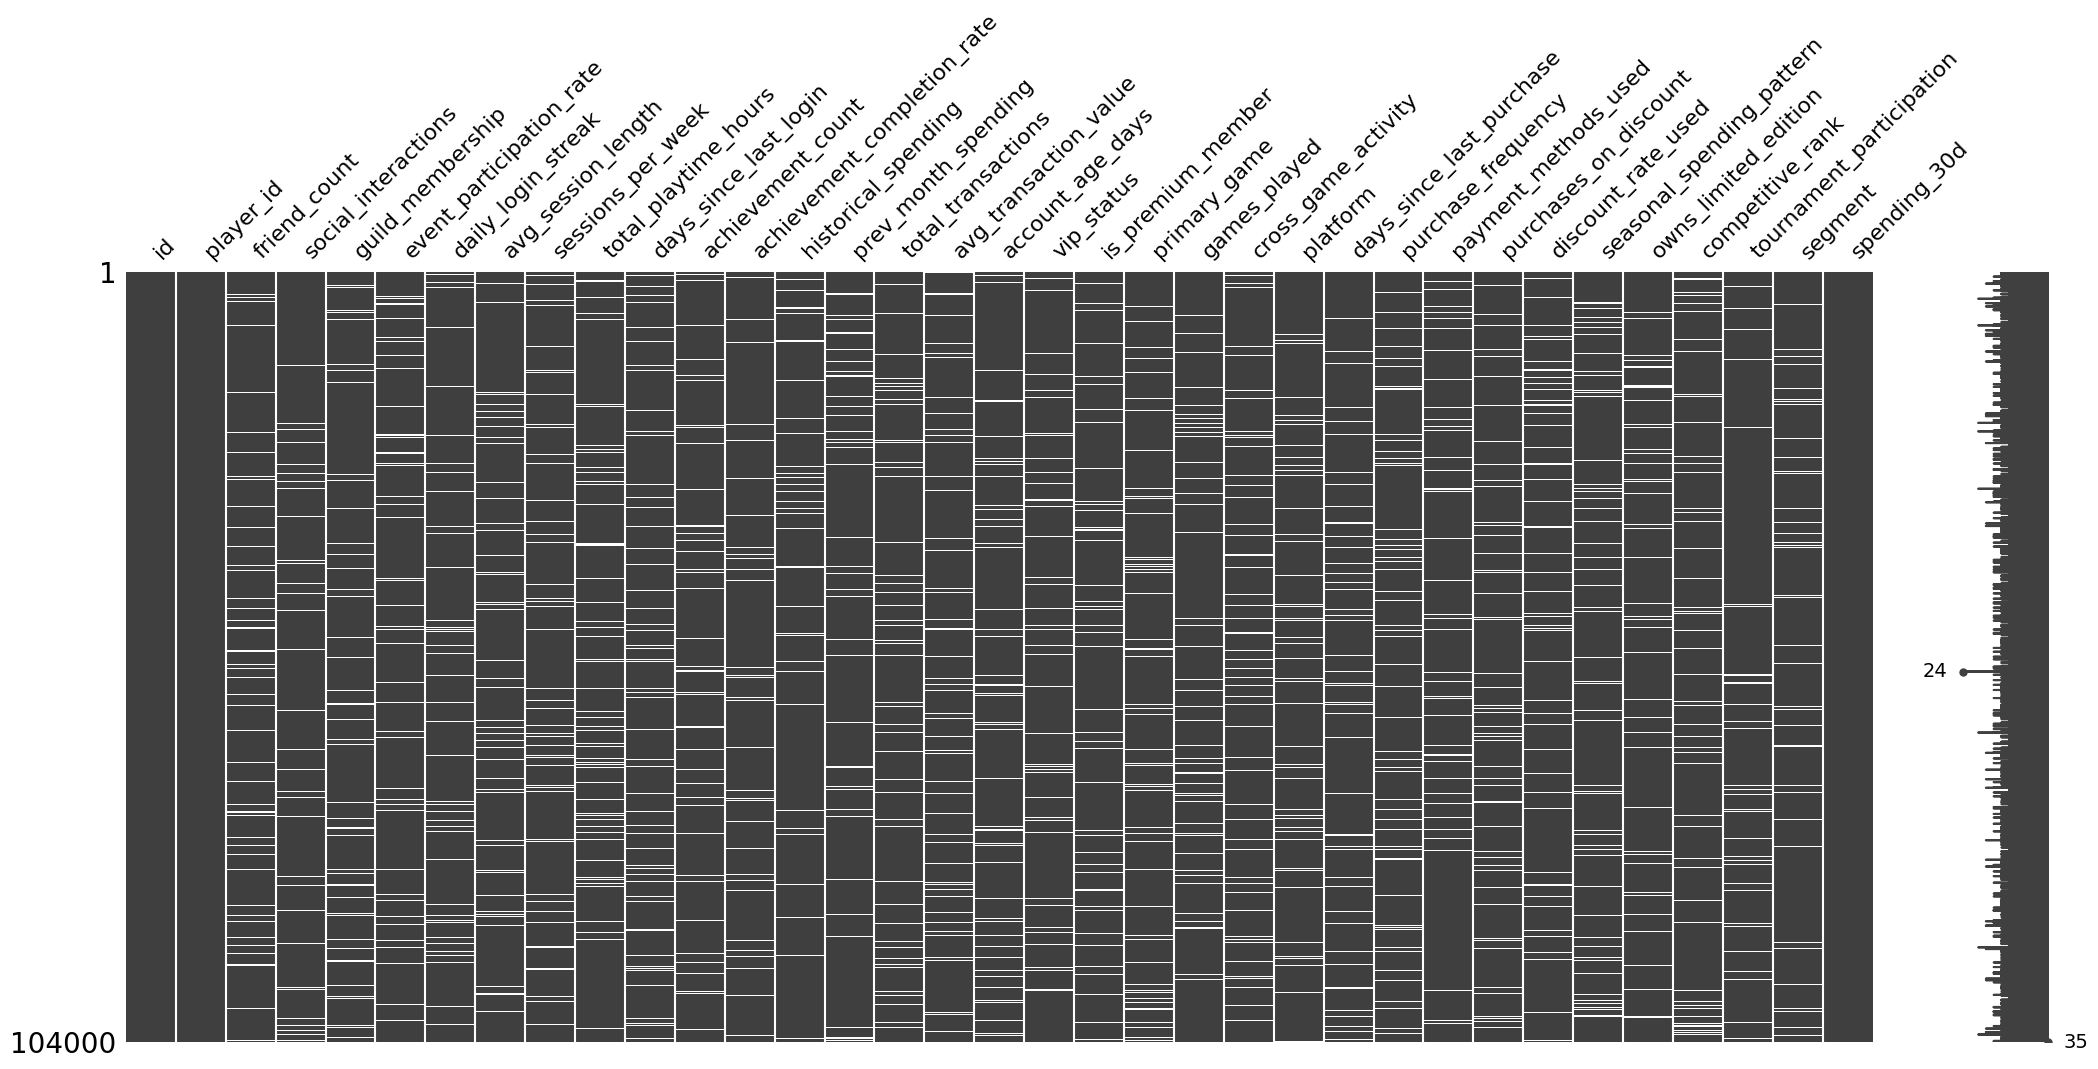

In [11]:

msno.matrix(df)

In [14]:
df.drop(['id', 'player_id'], axis = 1, inplace = True)
df.head()

,friend_count,social_interactions,guild_membership,event_participation_rate,daily_login_streak,avg_session_length,sessions_per_week,total_playtime_hours,days_since_last_login,achievement_count,achievement_completion_rate,historical_spending,prev_month_spending,total_transactions,avg_transaction_value,account_age_days,vip_status,is_premium_member,primary_game,games_played,cross_game_activity,platform,days_since_last_purchase,purchase_frequency,payment_methods_used,purchases_on_discount,discount_rate_used,seasonal_spending_pattern,owns_limited_edition,competitive_rank,tournament_participation,segment,spending_30d
0,140.0,39.0,NaN,35.495321,86.0,94.186687,20.660400,793.043827,6.918242,375.0,66.677804,NaN,960.560273,4.0,643.882786,76.0,0.0,0.0,0.0,4.0,27.0,0.0,11.375597,NaN,1.0,1.0,0.250000,4.0,NaN,7.0,1.0,1.0,0.00
1,126.0,12.0,1.0,35.222611,27.0,76.694036,15.112974,836.397667,3.514021,111.0,48.742068,193.279885,70.552503,43.0,NaN,1037.0,0.0,0.0,3.0,1.0,10.0,1.0,38.325987,11.193590,1.0,25.0,0.581395,5.0,0.0,3.0,0.0,1.0,0.00
2,157.0,63.0,1.0,54.291374,1.0,66.680997,13.770480,561.212807,1.863368,82.0,35.275348,24.147713,8.402845,49.0,0.492810,418.0,0.0,0.0,NaN,2.0,16.0,2.0,21.426924,5.175272,3.0,27.0,0.551020,7.0,0.0,5.0,0.0,1.0,0.00
3,89.0,96.0,1.0,52.990011,74.0,75.864572,11.941930,NaN,5.973982,122.0,49.815387,2145.126609,654.006363,41.0,52.320161,129.0,3.0,1.0,4.0,1.0,7.0,0.0,28.915478,10.374656,2.0,22.0,0.536585,6.0,0.0,9.0,0.0,2.0,2223.70
4,159.0,80.0,0.0,78.586509,84.0,33.774836,1.405901,617.041867,5.570188,189.0,89.271401,58696.454814,18294.693940,NaN,1397.534638,478.0,3.0,1.0,4.0,2.0,NaN,1.0,13.011954,NaN,3.0,11.0,0.261905,0.0,1.0,4.0,0.0,3.0,156634.22


In [15]:
df_mice = df.copy(deep=True)

mice_imputer = IterativeImputer()

df_mice = mice_imputer.fit_transform(df_mice)

/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [16]:
df_filled = pd.DataFrame(df_mice, columns = df.columns)

df_filled.head()

,friend_count,social_interactions,guild_membership,event_participation_rate,daily_login_streak,avg_session_length,sessions_per_week,total_playtime_hours,days_since_last_login,achievement_count,achievement_completion_rate,historical_spending,prev_month_spending,total_transactions,avg_transaction_value,account_age_days,vip_status,is_premium_member,primary_game,games_played,cross_game_activity,platform,days_since_last_purchase,purchase_frequency,payment_methods_used,purchases_on_discount,discount_rate_used,seasonal_spending_pattern,owns_limited_edition,competitive_rank,tournament_participation,segment,spending_30d
0,140.0,39.0,0.597405,35.495321,86.0,94.186687,20.660400,793.043827,6.918242,375.0,66.677804,2733.778680,960.560273,4.000000,643.882786,76.0,0.0,0.0,0.000000,4.0,27.000000,0.0,11.375597,14.482772,1.0,1.0,0.250000,4.0,-0.017687,7.0,1.0,1.0,0.00
1,126.0,12.0,1.000000,35.222611,27.0,76.694036,15.112974,836.397667,3.514021,111.0,48.742068,193.279885,70.552503,43.000000,-110.211745,1037.0,0.0,0.0,3.000000,1.0,10.000000,1.0,38.325987,11.193590,1.0,25.0,0.581395,5.0,0.000000,3.0,0.0,1.0,0.00
2,157.0,63.0,1.000000,54.291374,1.0,66.680997,13.770480,561.212807,1.863368,82.0,35.275348,24.147713,8.402845,49.000000,0.492810,418.0,0.0,0.0,1.988896,2.0,16.000000,2.0,21.426924,5.175272,3.0,27.0,0.551020,7.0,0.000000,5.0,0.0,1.0,0.00
3,89.0,96.0,1.000000,52.990011,74.0,75.864572,11.941930,653.209354,5.973982,122.0,49.815387,2145.126609,654.006363,41.000000,52.320161,129.0,3.0,1.0,4.000000,1.0,7.000000,0.0,28.915478,10.374656,2.0,22.0,0.536585,6.0,0.000000,9.0,0.0,2.0,2223.70
4,159.0,80.0,0.000000,78.586509,84.0,33.774836,1.405901,617.041867,5.570188,189.0,89.271401,58696.454814,18294.693940,39.516663,1397.534638,478.0,3.0,1.0,4.000000,2.0,15.984318,1.0,13.011954,14.405873,3.0,11.0,0.261905,0.0,1.000000,4.0,0.0,3.0,156634.22


# Step 2: Training Preparation

In [19]:
X = df_filled.drop(['spending_30d'], axis = 1)

X

,friend_count,social_interactions,guild_membership,event_participation_rate,daily_login_streak,avg_session_length,sessions_per_week,total_playtime_hours,days_since_last_login,achievement_count,achievement_completion_rate,historical_spending,prev_month_spending,total_transactions,avg_transaction_value,account_age_days,vip_status,is_premium_member,primary_game,games_played,cross_game_activity,platform,days_since_last_purchase,purchase_frequency,payment_methods_used,purchases_on_discount,discount_rate_used,seasonal_spending_pattern,owns_limited_edition,competitive_rank,tournament_participation,segment
0,140.0,39.000000,0.597405,35.495321,86.0,94.186687,20.660400,793.043827,6.918242,375.0,66.677804,2733.778680,960.560273,4.000000,643.882786,76.0,0.0,0.0,0.000000,4.0,27.000000,0.0,11.375597,14.482772,1.0,1.0,0.250000,4.000000,-0.017687,7.0,1.000000,1.000000
1,126.0,12.000000,1.000000,35.222611,27.0,76.694036,15.112974,836.397667,3.514021,111.0,48.742068,193.279885,70.552503,43.000000,-110.211745,1037.0,0.0,0.0,3.000000,1.0,10.000000,1.0,38.325987,11.193590,1.0,25.0,0.581395,5.000000,0.000000,3.0,0.000000,1.000000
2,157.0,63.000000,1.000000,54.291374,1.0,66.680997,13.770480,561.212807,1.863368,82.0,35.275348,24.147713,8.402845,49.000000,0.492810,418.0,0.0,0.0,1.988896,2.0,16.000000,2.0,21.426924,5.175272,3.0,27.0,0.551020,7.000000,0.000000,5.0,0.000000,1.000000
3,89.0,96.000000,1.000000,52.990011,74.0,75.864572,11.941930,653.209354,5.973982,122.0,49.815387,2145.126609,654.006363,41.000000,52.320161,129.0,3.0,1.0,4.000000,1.0,7.000000,0.0,28.915478,10.374656,2.0,22.0,0.536585,6.000000,0.000000,9.0,0.000000,2.000000
4,159.0,80.000000,0.000000,78.586509,84.0,33.774836,1.405901,617.041867,5.570188,189.0,89.271401,58696.454814,18294.693940,39.516663,1397.534638,478.0,3.0,1.0,4.000000,2.0,15.984318,1.0,13.011954,14.405873,3.0,11.0,0.261905,0.000000,1.000000,4.0,0.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,81.0,54.000000,1.000000,67.570582,105.0,36.785310,6.671382,860.003706,7.762639,131.0,62.180172,3092.477040,1128.808134,7.000000,441.782434,1491.0,0.0,0.0,4.000000,2.0,11.000000,1.0,7.544564,15.210202,1.0,3.0,0.428571,1.000000,0.000000,5.0,0.000000,2.000000
103996,117.0,62.000000,1.000000,32.805233,79.0,151.619561,6.211211,173.501198,11.287810,249.0,44.957950,946.908601,377.129725,23.000000,41.169939,357.0,0.0,0.0,4.000000,5.0,21.000000,0.0,34.793927,7.204170,1.0,6.0,0.260870,5.513444,0.000000,7.0,0.000000,0.000000
103997,217.0,4.000000,1.000000,11.347544,73.0,61.428907,7.193119,691.056362,19.752612,221.0,57.356763,567.404745,222.748167,11.000000,51.582250,100.0,1.0,0.0,4.000000,1.0,7.389359,1.0,27.054709,11.371481,2.0,5.0,0.454545,2.000000,0.000000,8.0,0.000000,-0.121616
103998,89.0,54.968104,1.000000,17.576616,68.0,54.914447,6.288369,362.560021,3.407455,261.0,44.613803,352.470478,117.391754,15.000000,23.498032,745.0,0.0,0.0,3.000000,5.0,44.000000,1.0,20.222724,11.241424,1.0,4.0,0.266667,3.000000,0.000000,5.0,0.000000,-0.072442


In [20]:
y = df_filled['spending_30d']

y

0              0.00
1              0.00
2              0.00
3           2223.70
4         156634.22
            ...    
103995      2566.70
103996       527.04
103997         0.00
103998         0.00
103999       651.30
Name: spending_30d, Length: 104000, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 123)

X_train.shape

(83200, 32)

# Step 3: Modeling

In [35]:
from sklearn.cross_decomposition import PLSRegression

reg = PLSRegression()

reg.fit(X_train, y_train)


,n_components,2
,scale,True
,max_iter,500
,tol,1e-06
,copy,True


In [40]:
y_pred = reg.predict(X_test)

y_pred = np.maximum(y_pred, 0)
y_pred

array([   0.        ,    0.        , 1505.5069573 , ...,    0.        ,
       1492.62644244,    0.        ], shape=(20800,))

In [42]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

5058.926871718328

In [46]:
joblib.dump(reg, 'task3/model3.pkl')

['task3/model3.pkl']